<a href="https://colab.research.google.com/github/almostoutlier/Projects/blob/main/Pok%C3%A9mon_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Importing Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
originalfile = pd.read_csv("/content/drive/MyDrive/Projects/Pokemon/pokemon.csv")
originalfile.head()

,name,abilities,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,type2,weight_kg,generation,is_legendary,abilities1,abilities2,abilities3,abilities4,abilities5,abilities6
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,poison,6.9,1,0,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
1,Ivysaur,"['Overgrow', 'Chlorophyll']",2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,poison,13.0,1,0,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
2,Venusaur,"['Overgrow', 'Chlorophyll']",3,1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,poison,100.0,1,0,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
3,Charmander,"['Blaze', 'Solar Power']",4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,...,normal,8.5,1,0,Blaze,Solar Power,NaN,NaN,NaN,NaN
4,Charmeleon,"['Blaze', 'Solar Power']",5,0.5,1.0,1.0,1.0,0.5,1.0,0.5,...,normal,19.0,1,0,Blaze,Solar Power,NaN,NaN,NaN,NaN


# Pokemon EDA

In [ ]:
originalfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               800 non-null    object 
 1   abilities          800 non-null    object 
 2   pokedex_number     800 non-null    int64  
 3   against_bug        800 non-null    float64
 4   against_dark       800 non-null    float64
 5   against_dragon     800 non-null    float64
 6   against_electric   800 non-null    float64
 7   against_fairy      800 non-null    float64
 8   against_fight      800 non-null    float64
 9   against_fire       800 non-null    float64
 10  against_flying     800 non-null    float64
 11  against_ghost      800 non-null    float64
 12  against_grass      800 non-null    float64
 13  against_ground     800 non-null    float64
 14  against_ice        800 non-null    float64
 15  against_normal     800 non-null    float64
 16  against_poison     800 non

In [ ]:
df=originalfile

In [ ]:
df.isnull().sum()

name                   0
abilities              0
pokedex_number         0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
percentage_male       97
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                  0
weight_kg             20
generation             0


In [ ]:
df['height_m'].fillna(0)
df['percentage_male'].fillna(0)
df['weight_kg'].fillna(0)

0        6.9
1       13.0
2      100.0
3        8.5
4       19.0
       ...  
795    999.9
796      0.1
797    888.0
798    230.0
799     80.5
Name: weight_kg, Length: 800, dtype: float64

In [ ]:
# Pokémon-themed color palette
pokemon_colors = ['#FFCB05', '#3D7DCA', '#003A70', '#FB1B1B', '#FDEBEF']

# Set the style for all plots
plt.style.use('seaborn')
sns.set_palette(pokemon_colors)

# Pokemon KPI's

1. Distribution of Pokémon types

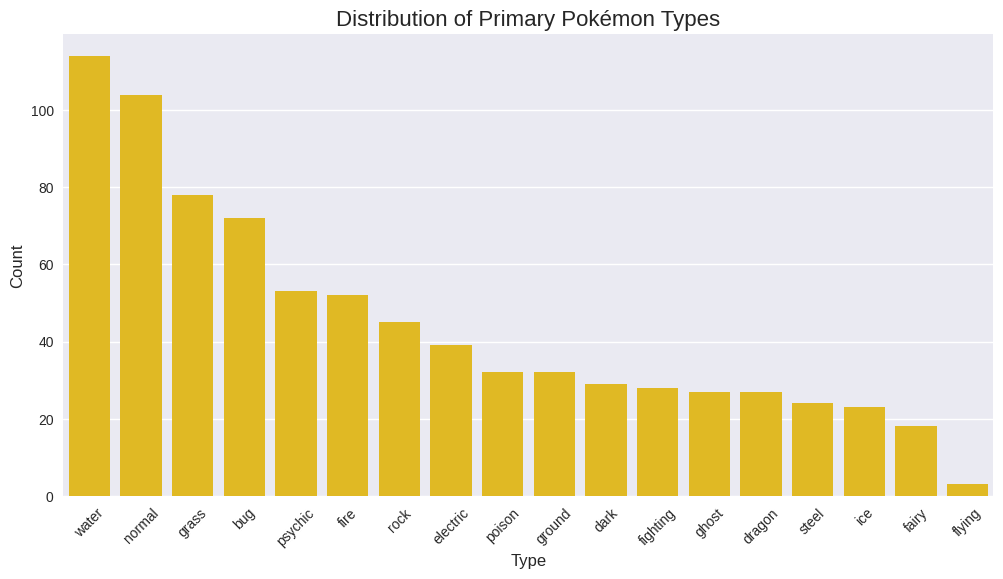

In [ ]:
plt.figure(figsize=(12, 6))
type_counts = df['type1'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Distribution of Primary Pokémon Types', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

2. Male-to-female ratio distribution

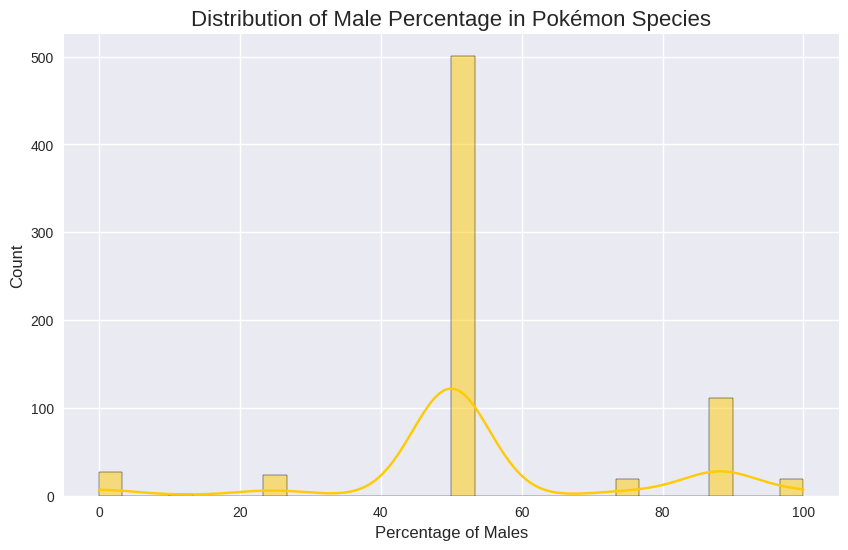

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['percentage_male'].dropna(), kde=True, bins=30)
plt.title('Distribution of Male Percentage in Pokémon Species', fontsize=16)
plt.xlabel('Percentage of Males', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

3. Top 10 heaviest Pokémon

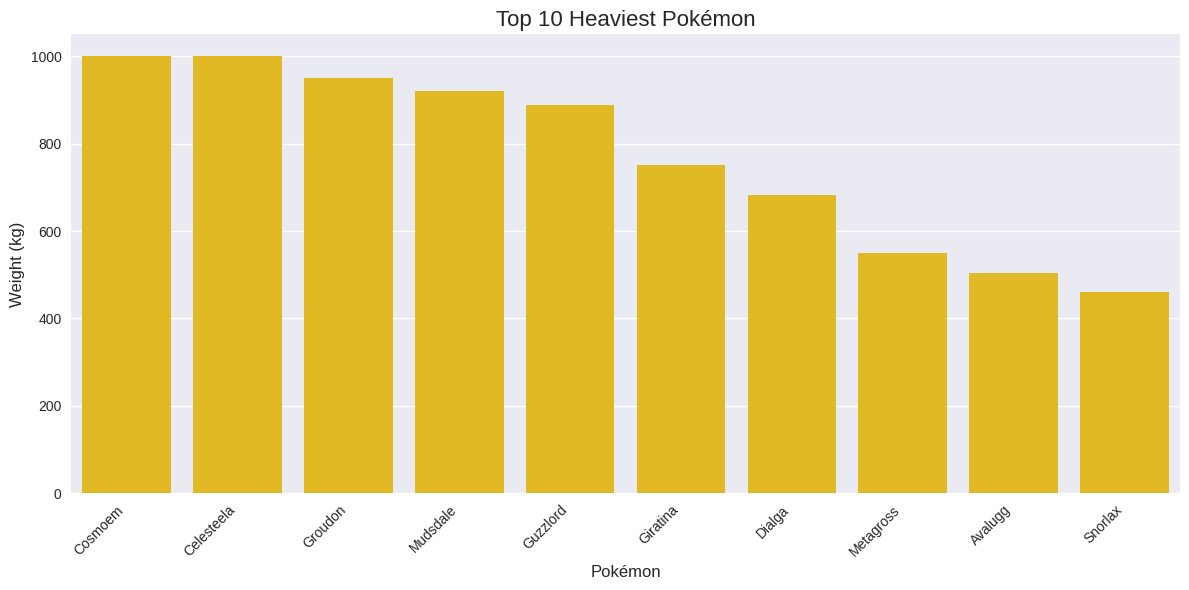

In [ ]:
top_10_heavy = df.nlargest(10, 'weight_kg')
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='weight_kg', data=top_10_heavy)
plt.title('Top 10 Heaviest Pokémon', fontsize=16)
plt.xlabel('Pokémon', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. What is the distribution of Pokémon heights?

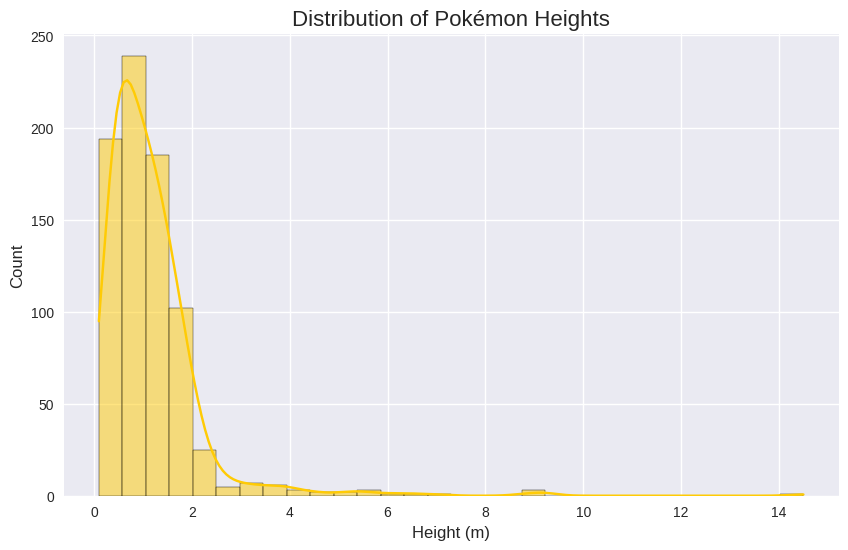

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['height_m'].dropna().astype(float), kde=True, bins=30)
plt.title('Distribution of Pokémon Heights', fontsize=16)
plt.xlabel('Height (m)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

5. What are the most common Pokémon classifications?

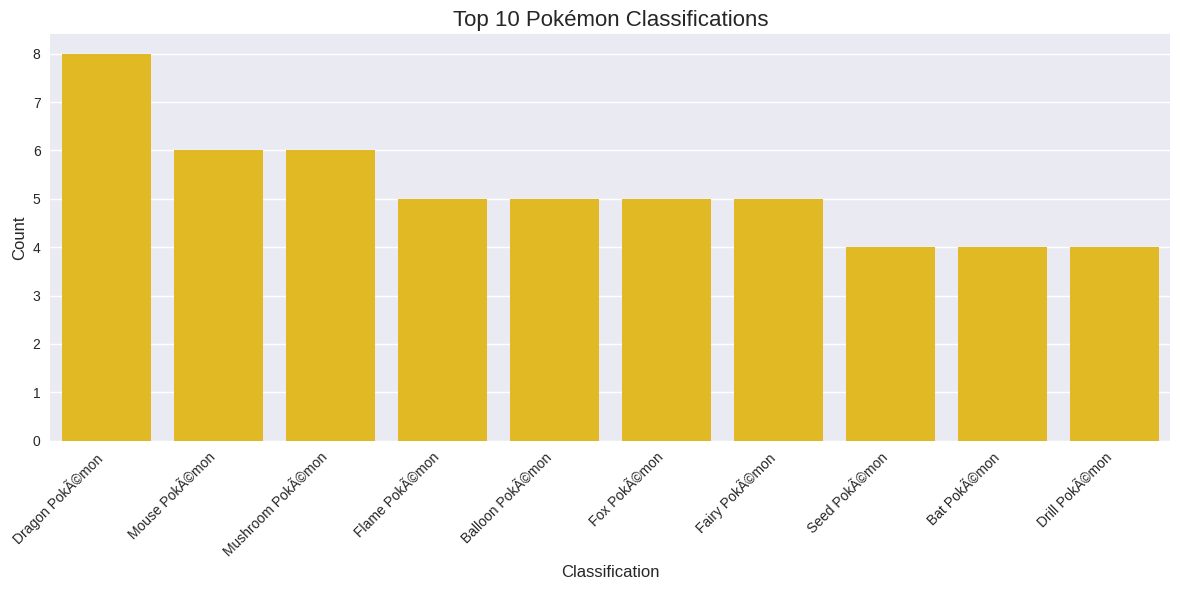

In [ ]:
plt.figure(figsize=(12, 6))
top_10_classifications = df['classfication'].value_counts().nlargest(10)
sns.barplot(x=top_10_classifications.index, y=top_10_classifications.values)
plt.title('Top 10 Pokémon Classifications', fontsize=16)
plt.xlabel('Classification', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Is there a correlation between a Pokémon's weight and its base stats?

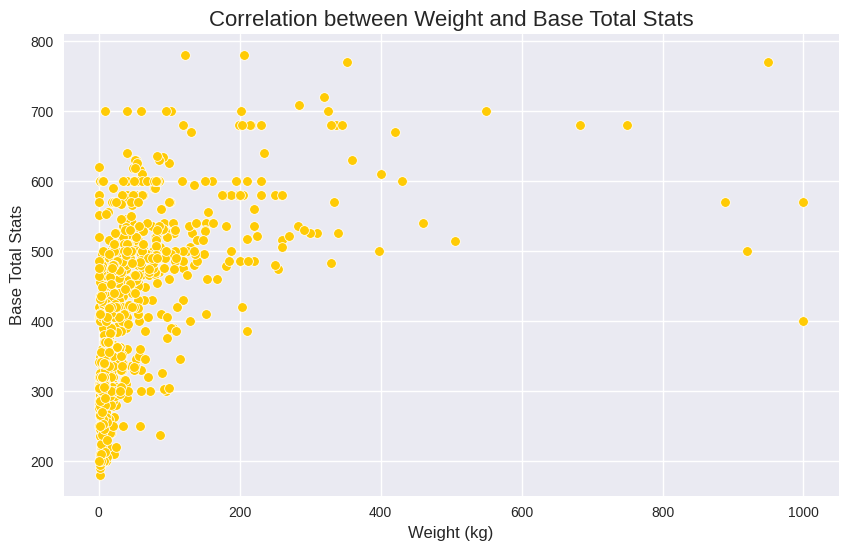

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight_kg', y='base_total', data=df)
plt.title('Correlation between Weight and Base Total Stats', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Base Total Stats', fontsize=12)
plt.show()

7. How does the number of abilities vary across Pokémon?

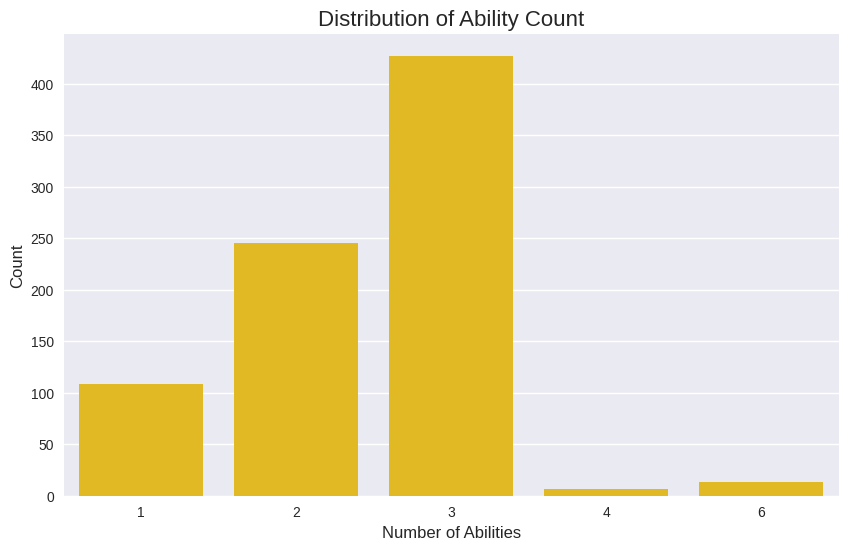

In [ ]:
df['ability_count'] = df[['abilities1', 'abilities2', 'abilities3', 'abilities4', 'abilities5', 'abilities6']].notna().sum(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='ability_count', data=df)
plt.title('Distribution of Ability Count', fontsize=16)
plt.xlabel('Number of Abilities', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

8. How does the attack-defense ratio distribute among Pokémon?

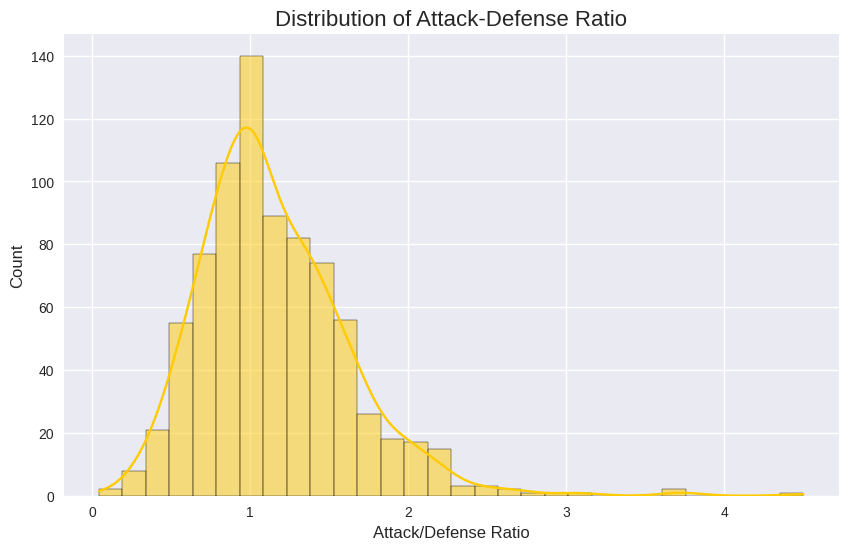

In [ ]:
df['attack_defense_ratio'] = df['attack'] / df['defense']
plt.figure(figsize=(10, 6))
sns.histplot(df['attack_defense_ratio'], kde=True, bins=30)
plt.title('Distribution of Attack-Defense Ratio', fontsize=16)
plt.xlabel('Attack/Defense Ratio', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

9. What is the relationship between a Pokémon's speed and its capture rate?

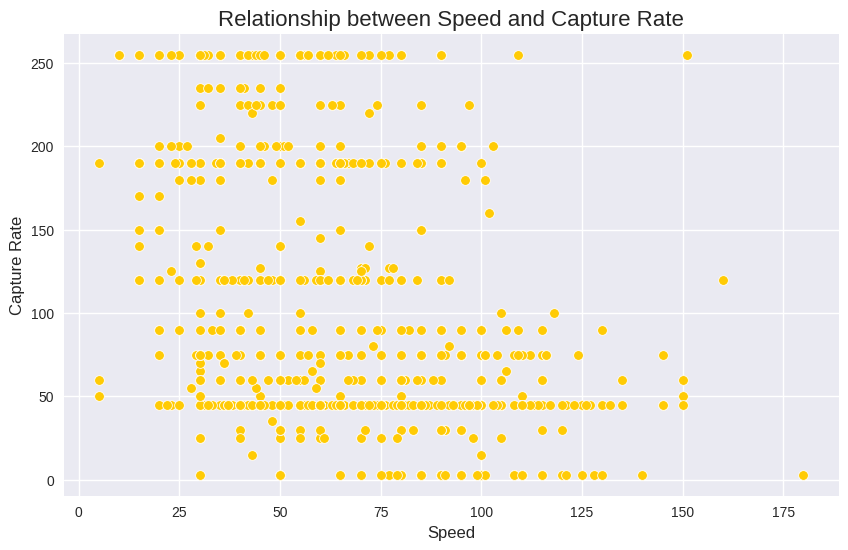

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speed', y='capture_rate', data=df)
plt.title('Relationship between Speed and Capture Rate', fontsize=16)
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Capture Rate', fontsize=12)
plt.show()

# Data Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  800 non-null    object 
 1   abilities             800 non-null    object 
 2   pokedex_number        800 non-null    int64  
 3   against_bug           800 non-null    float64
 4   against_dark          800 non-null    float64
 5   against_dragon        800 non-null    float64
 6   against_electric      800 non-null    float64
 7   against_fairy         800 non-null    float64
 8   against_fight         800 non-null    float64
 9   against_fire          800 non-null    float64
 10  against_flying        800 non-null    float64
 11  against_ghost         800 non-null    float64
 12  against_grass         800 non-null    float64
 13  against_ground        800 non-null    float64
 14  against_ice           800 non-null    float64
 15  against_normal        8

In [ ]:
df.nunique()

name                    799
abilities               481
pokedex_number          800
against_bug               5
against_dark              5
against_dragon            4
against_electric          6
against_fairy             5
against_fight             6
against_fire              5
against_flying            5
against_ghost             5
against_grass             5
against_ground            6
against_ice               5
against_normal            4
against_poison            6
against_psychic           6
against_rock              5
against_steel             5
against_water             5
attack                  114
base_egg_steps           10
base_happiness            6
base_total              203
capture_rate             33
classfication           588
defense                 109
experience_growth         6
height_m                 51
hp                       99
japanese_name           800
percentage_male           7
sp_attack               111
sp_defense               97
speed               

In [ ]:
df_with_dummies = pd.get_dummies(df, columns=['type1'], prefix='type')

# Verify the new columns
type_columns = [col for col in df_with_dummies.columns if col.startswith('type_')]
print("New type columns:", type_columns)

New type columns: ['type_bug', 'type_dark', 'type_dragon', 'type_electric', 'type_fairy', 'type_fighting', 'type_fire', 'type_flying', 'type_ghost', 'type_grass', 'type_ground', 'type_ice', 'type_normal', 'type_poison', 'type_psychic', 'type_rock', 'type_steel', 'type_water']


In [ ]:
len(type_columns)

18

In [ ]:
df_with_dummies.head()

,name,abilities,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,False,True,False,False,False,False,False,False,False,False
1,Ivysaur,"['Overgrow', 'Chlorophyll']",2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,False,True,False,False,False,False,False,False,False,False
2,Venusaur,"['Overgrow', 'Chlorophyll']",3,1.0,1.0,1.0,0.5,0.5,0.5,2.0,...,False,True,False,False,False,False,False,False,False,False
3,Charmander,"['Blaze', 'Solar Power']",4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False
4,Charmeleon,"['Blaze', 'Solar Power']",5,0.5,1.0,1.0,1.0,0.5,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  800 non-null    object 
 1   abilities             800 non-null    object 
 2   pokedex_number        800 non-null    int64  
 3   against_bug           800 non-null    float64
 4   against_dark          800 non-null    float64
 5   against_dragon        800 non-null    float64
 6   against_electric      800 non-null    float64
 7   against_fairy         800 non-null    float64
 8   against_fight         800 non-null    float64
 9   against_fire          800 non-null    float64
 10  against_flying        800 non-null    float64
 11  against_ghost         800 non-null    float64
 12  against_grass         800 non-null    float64
 13  against_ground        800 non-null    float64
 14  against_ice           800 non-null    float64
 15  against_normal        8

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numerical Columns:", numerical_columns)

Numerical Columns: ['pokedex_number', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary', 'ability_count', 'attack_defense_ratio']


In [ ]:
scaled_df = scaler.fit_transform(df_with_dummies.drop(columns=['name', 'abilities', 'pokedex_number', 'classfication', 'generation', 'base_egg_steps', 'experience_growth', 'japanese_name', 'type2', 'abilities1', 'abilities2', 'abilities3', 'abilities4', 'abilities5', 'abilities6']))

In [ ]:
scaled_df = pd.DataFrame(scaled_df,columns=['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'is_legendary', 'ability_count', 'attack_defense_ratio', 'type_bug', 'type_dark', 'type_dragon', 'type_electric', 'type_fairy', 'type_fighting', 'type_fire', 'type_flying', 'type_ghost', 'type_grass', 'type_ground', 'type_ice', 'type_normal', 'type_poison', 'type_psychic', 'type_rock', 'type_steel', 'type_water'])
scaled_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
0,0.006279,-0.130524,0.088513,-0.87649,-1.089822,-0.787696,1.249393,1.334893,0.024678,-0.993874,...,-0.186893,3.042435,-0.204124,-0.172049,-0.386556,-0.204124,-0.266365,-0.244137,-0.175863,-0.407653
1,0.006279,-0.130524,0.088513,-0.87649,-1.089822,-0.787696,1.249393,1.334893,0.024678,-0.993874,...,-0.186893,3.042435,-0.204124,-0.172049,-0.386556,-0.204124,-0.266365,-0.244137,-0.175863,-0.407653
2,0.006279,-0.130524,0.088513,-0.87649,-1.089822,-0.787696,1.249393,1.334893,0.024678,-0.993874,...,-0.186893,3.042435,-0.204124,-0.172049,-0.386556,-0.204124,-0.266365,-0.244137,-0.175863,-0.407653
3,-0.830895,-0.130524,0.088513,-0.11308,-1.089822,-0.089848,-0.918751,-0.319506,0.024678,-0.676975,...,-0.186893,-0.328684,-0.204124,-0.172049,-0.386556,-0.204124,-0.266365,-0.244137,-0.175863,-0.407653
4,-0.830895,-0.130524,0.088513,-0.11308,-1.089822,-0.089848,-0.918751,-0.319506,0.024678,-0.676975,...,-0.186893,-0.328684,-0.204124,-0.172049,-0.386556,-0.204124,-0.266365,-0.244137,-0.175863,-0.407653


In [ ]:
scaled_df.isnull().sum()
columns_with_nulls = ['height_m', 'percentage_male', 'weight_kg']
scaled_df[columns_with_nulls] = scaled_df[columns_with_nulls].fillna(0)

In [ ]:
cos_sim = cosine_similarity(scaled_df.values,scaled_df.values)

In [ ]:
cos_sim.shape

(800, 800)

# Recommendation system

In [ ]:
df=df.drop(columns=['abilities1', 'abilities2', 'abilities3', 'abilities4', 'abilities5', 'abilities6', 'ability_count', 'weight_kg', 'japanese_name', 'percentage_male', 'height_m', 'experience_growth', 'classfication', 'capture_rate', 'base_total', 'base_happiness', 'base_egg_steps'])

In [ ]:
poke_index = pd.Series(df.index,index=df['name'])

In [ ]:
def recommend(pokemon,recommendations=5):
    index = poke_index[pokemon]
    similarity_score = list(enumerate(cos_sim[index]))
    sorted_score = sorted(similarity_score,key=lambda x : x[1],reverse=True)
    similar_pokemon = sorted_score[1:recommendations+1]
    poke_indices = [i[0] for i in similar_pokemon]
    return df.iloc[poke_indices]

In [ ]:
recommend('Pikachu')

,name,abilities,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,defense,hp,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,attack_defense_ratio
601,Tynamo,['Levitate'],602,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,40,35,45,40,60,electric,normal,5,0,1.375
521,Blitzle,"['Lightningrod', 'Motor Drive', 'Sap Sipper']",522,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,32,45,50,32,76,electric,normal,5,0,1.875
310,Plusle,"['Plus', 'Lightningrod']",311,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,40,60,85,75,95,electric,normal,3,0,1.250
308,Electrike,"['Static', 'Lightningrod', 'Minus']",309,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,40,40,65,40,65,electric,normal,3,0,1.125
99,Voltorb,"['Soundproof', 'Static', 'Aftermath']",100,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,50,40,55,55,100,electric,normal,1,0,0.600


In [ ]:
def rec_pokemon_byFilter(pokemon,
                         recommendations = 10,
                         include_original = False,
                         Type = None,
                         Type2 = None,
                         Generation = None,
                         pokemon_type = None):

    '''
    Recommends top 10 Pokemon which are similar to the given Pokemon

    By default number of recommendations is set to 10

    pokemon          : Name of the pokemon in string format
    recommendation   : Number of similar pokemon in the output, value must be Integer
    include_original : Includes the given pokemon in the output dataframe, value must be boolean
    Type             : Filter output by primary type
    Type2            : Filter output by secondary type
    Generation       : Filter output by Generation
    pokemon_type     : Filter output by Pokemon Type

    '''
    index = poke_index[pokemon]
    similarity_score = list(enumerate(cos_sim[index]))
    sorted_score = sorted(similarity_score,key=lambda x : x[1],reverse=True)


    if include_original == False:
        similar_pokemon = sorted_score[1:]
    elif include_original == True:
        similar_pokemon = sorted_score

    poke_indices = [i[0] for i in similar_pokemon]
    tempdf = df.iloc[poke_indices]

    if Type != None:
        tempdf = tempdf[(tempdf['type1'] == Type)|(tempdf['type2'] == Type)]
    else:
        pass

    if Type2 != None:
        tempdf = tempdf[(tempdf['type1'] == Type2)|(tempdf['type2'] == Type2)]
    else:
        pass

    if Generation != None:
        tempdf = tempdf[tempdf['generation'] == Generation]
    else:
        pass

    return tempdf.head(recommendations) if include_original == False else tempdf.head(recommendations+1)

In [ ]:
rec_pokemon_byFilter('Charizard',recommendations=5)

,name,abilities,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,defense,hp,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,attack_defense_ratio
662,Talonflame,"['Flame Body', 'Gale Wings']",663,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,71,78,74,69,126,fire,flying,6,0,1.140845
145,Moltres,"['Pressure', 'Flame Body']",146,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,90,90,125,85,90,fire,flying,1,1,1.111111
740,Oricorio,['Dancer'],741,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,70,75,98,70,93,fire,flying,7,0,1.000000
466,Magmortar,"['Flame Body', 'Vital Spirit']",467,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,67,75,125,95,83,fire,normal,4,0,1.417910
156,Typhlosion,"['Blaze', 'Flash Fire']",157,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,78,78,109,85,100,fire,normal,2,0,1.076923


In [ ]:
rec_pokemon_byFilter('Charizard',recommendations=10,pokemon_type='normal',include_original=True)

,name,abilities,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,defense,hp,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,attack_defense_ratio
5,Charizard,"['Blaze', 'Solar Power']",6,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,78,78,159,115,100,fire,flying,1,0,1.333333
662,Talonflame,"['Flame Body', 'Gale Wings']",663,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,71,78,74,69,126,fire,flying,6,0,1.140845
145,Moltres,"['Pressure', 'Flame Body']",146,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,90,90,125,85,90,fire,flying,1,1,1.111111
740,Oricorio,['Dancer'],741,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,70,75,98,70,93,fire,flying,7,0,1.000000
466,Magmortar,"['Flame Body', 'Vital Spirit']",467,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,67,75,125,95,83,fire,normal,4,0,1.417910
156,Typhlosion,"['Blaze', 'Flash Fire']",157,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,78,78,109,85,100,fire,normal,2,0,1.076923
249,Ho-Oh,"['Pressure', 'Regenerator']",250,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,90,106,110,154,90,fire,flying,2,1,1.444444
125,Magmar,"['Flame Body', 'Vital Spirit']",126,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,57,65,100,85,93,fire,normal,1,0,1.666667
58,Arcanine,"['Intimidate', 'Flash Fire', 'Justified']",59,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,80,90,100,80,95,fire,normal,1,0,1.375000
661,Fletchinder,"['Flame Body', 'Gale Wings']",662,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,55,62,56,52,84,fire,flying,6,0,1.327273


In [ ]:
rec_pokemon_byFilter('Charizard',recommendations=10,include_original=True,Type='dragon')

,name,abilities,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,defense,hp,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,attack_defense_ratio
774,Turtonator,['Shell Armor'],776,0.5,1.0,2.0,0.5,1.0,1.0,0.25,...,135,60,91,85,36,fire,dragon,7,0,0.577778
383,Rayquaza,['Air Lock'],384,0.5,1.0,2.0,1.0,2.0,0.5,0.50,...,100,105,180,100,115,dragon,flying,3,1,1.800000
642,Reshiram,['Turboblaze'],643,0.5,1.0,2.0,0.5,1.0,1.0,0.25,...,100,100,150,120,90,dragon,fire,5,1,1.200000
372,Salamence,"['Intimidate', 'Moxie']",373,0.5,1.0,2.0,1.0,2.0,0.5,0.50,...,130,95,120,90,120,dragon,flying,3,0,1.115385
148,Dragonite,"['Inner Focus', 'Multiscale']",149,0.5,1.0,2.0,1.0,2.0,0.5,0.50,...,95,91,100,100,80,dragon,flying,1,0,1.410526
333,Altaria,"['Natural Cure', 'Cloud Nine']",334,0.5,1.0,2.0,1.0,2.0,0.5,0.50,...,110,75,110,105,80,dragon,flying,3,0,1.000000
380,Latios,['Levitate'],381,2.0,2.0,2.0,0.5,2.0,0.5,0.50,...,100,80,160,120,110,dragon,psychic,3,1,1.300000
483,Palkia,"['Pressure', 'Telepathy']",484,1.0,1.0,2.0,1.0,2.0,1.0,0.25,...,100,90,150,120,100,water,dragon,4,1,1.200000
645,Kyurem,"['Pressure', 'Teravolt', 'Turboblaze']",646,1.0,1.0,2.0,0.5,2.0,2.0,1.00,...,90,125,170,100,95,dragon,ice,5,1,1.333333
705,Goodra,"['Sap Sipper', 'Hydration', 'Gooey']",706,1.0,1.0,2.0,0.5,2.0,1.0,0.50,...,70,90,110,150,80,dragon,normal,6,0,1.428571


In [ ]:
rec_pokemon_byFilter('Charizard',recommendations=10,include_original=True,Type='fire')

,name,abilities,pokedex_number,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,...,defense,hp,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,attack_defense_ratio
5,Charizard,"['Blaze', 'Solar Power']",6,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,78,78,159,115,100,fire,flying,1,0,1.333333
662,Talonflame,"['Flame Body', 'Gale Wings']",663,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,71,78,74,69,126,fire,flying,6,0,1.140845
145,Moltres,"['Pressure', 'Flame Body']",146,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,90,90,125,85,90,fire,flying,1,1,1.111111
740,Oricorio,['Dancer'],741,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,70,75,98,70,93,fire,flying,7,0,1.000000
466,Magmortar,"['Flame Body', 'Vital Spirit']",467,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,67,75,125,95,83,fire,normal,4,0,1.417910
156,Typhlosion,"['Blaze', 'Flash Fire']",157,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,78,78,109,85,100,fire,normal,2,0,1.076923
249,Ho-Oh,"['Pressure', 'Regenerator']",250,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,90,106,110,154,90,fire,flying,2,1,1.444444
125,Magmar,"['Flame Body', 'Vital Spirit']",126,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,57,65,100,85,93,fire,normal,1,0,1.666667
58,Arcanine,"['Intimidate', 'Flash Fire', 'Justified']",59,0.50,1.0,1.0,1.0,0.5,1.0,0.5,...,80,90,100,80,95,fire,normal,1,0,1.375000
661,Fletchinder,"['Flame Body', 'Gale Wings']",662,0.25,1.0,1.0,2.0,0.5,0.5,0.5,...,55,62,56,52,84,fire,flying,6,0,1.327273
